Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import pickle
%matplotlib inline

Loading Data

In [2]:
data=pd.read_csv("Admission_Predict.csv")

In [3]:
data.isna().sum()                    #data has no null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Data Description

In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data=data.drop(["Serial No."],axis=1)

Features and Target Loading

In [7]:
X=data.iloc[:,0:7]
y=data.iloc[:,-1]

EDA

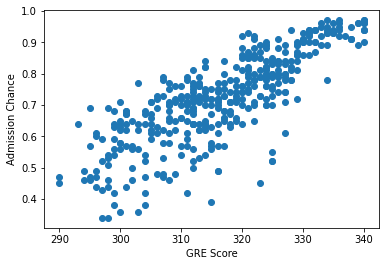

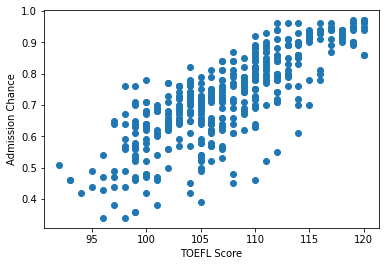

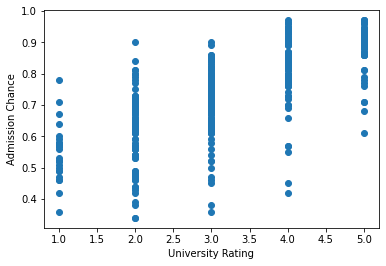

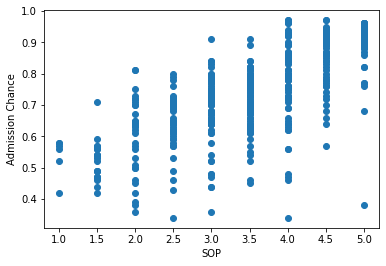

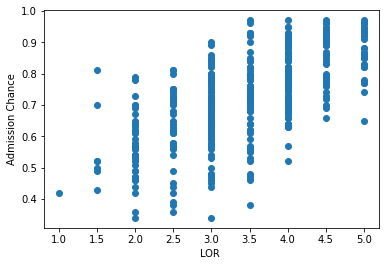

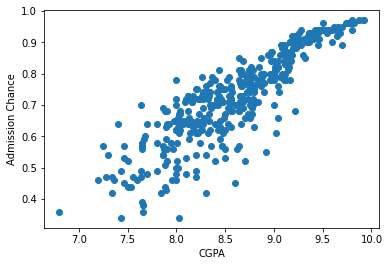

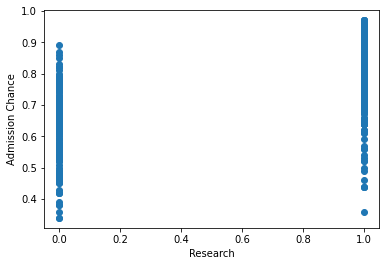

In [8]:
for col in X.columns:
  plt.scatter(X[col],y)
  plt.xlabel(col)
  plt.ylabel("Admission Chance")
  plt.show()

Feature Scalling

In [9]:
scaler_feature=StandardScaler()
scaled_data=scaler_feature.fit_transform(X)
scaled_data

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

Splitting Data in Train and Test

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

Training the Model

In [11]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_

array([ 0.00145482,  0.00337455,  0.00486683, -0.00719763,  0.02506436,
        0.1265391 ,  0.02454497])

Prediction and Accuracy Check

In [13]:
predictions=model.predict(X_test)
score=r2_score(predictions,y_test)
score

0.7626526985899933

Saving the Model for Further Use

In [14]:
filename ="admission_predictor.pickle"
pickle.dump(model,open(filename,'wb'))

Loading the Data

In [15]:
loaded_model=pickle.load(open(filename,'rb'))

Predicting with the use of Loaded Model

In [16]:
a=loaded_model.predict([[320,120,5,5,5,10,1]])
a[0]

0.9944035869093781

There is a highly likely chance to get admitted in a college with this score.